In [1]:
import pandas as pd

df = pd.read_csv("/home/yair/Downloads/heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### leaving only important features

In [2]:
# Assuming your dataset is in a DataFrame called 'df'
# Keep only the specified columns
df = df[['HadHeartAttack', 'SmokerStatus', 'AgeCategory']]

# Display the filtered DataFrame
print(df.head())


  HadHeartAttack   SmokerStatus      AgeCategory
0             No  Former smoker     Age 65 to 69
1             No  Former smoker     Age 70 to 74
2             No  Former smoker     Age 75 to 79
3             No   Never smoked  Age 80 or older
4             No   Never smoked  Age 80 or older


### Fixing age category

In [3]:
import pandas as pd

# Sample function to calculate the mean of the age range
def age_category_mean(age_str):
    if "or older" in age_str:
        return int(age_str.split()[1])  # Get the age number before "or older"
    else:
        # Split the age range, convert to int, and calculate the mean
        age_range = age_str.split()[1::2]  # Extract the start and end of the range
        return sum(map(int, age_range)) // 2

# Apply the function to the 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].apply(age_category_mean)
df.head()

,HadHeartAttack,SmokerStatus,AgeCategory
0,No,Former smoker,67
1,No,Former smoker,72
2,No,Former smoker,77
3,No,Never smoked,80
4,No,Never smoked,80


### Looking at Smokerstatues

In [4]:
import pandas as pd

# Assuming df is your dataframe
unique_smoking = df['SmokerStatus'].unique()

# Print all unique values
for category in unique_smoking:
    print(category)


Former smoker
Never smoked
Current smoker - now smokes every day
Current smoker - now smokes some days


### Fixing Smoker Statues

In [5]:
# Function to map detailed smoking statuses to broader categories
def combine_current_smoking(status):
    if 'Current smoker' in status:
        return 'Current smoker'
    else:
        return status

# Apply the function to the 'SmokerStatus' column
df['SmokerStatus'] = df['SmokerStatus'].apply(combine_current_smoking)

df["SmokerStatus"].unique()

array(['Former smoker', 'Never smoked', 'Current smoker'], dtype=object)

In [6]:
# Function to map detailed smoking statuses to broader categories
def simplify_smoker_status(status):
    if 'Current smoker' in status:
        return 'Current'
    elif 'Former smoker' in status:
        return 'Former'
    elif 'Never smoked' in status:
        return 'Never'
    else:
        return 'Unknown'

# Apply the function to the 'SmokerStatus' column
df['SmokerStatus'] = df['SmokerStatus'].apply(simplify_smoker_status)

# Print the dataframe with the new column
df.head()


,HadHeartAttack,SmokerStatus,AgeCategory
0,No,Former,67
1,No,Former,72
2,No,Former,77
3,No,Never,80
4,No,Never,80


### Fixing heart attack to numerical

In [7]:
import pandas as pd

# Mapping function to convert 'Yes' to 1 and 'No' to 0
def convert_heart_attack_status(status):
    return 1 if status == 'Yes' else 0

# Apply the function to the 'HadHeartAttack' column
df['HadHeartAttack'] = df['HadHeartAttack'].apply(convert_heart_attack_status)

# Print the updated dataframe
df.head()


,HadHeartAttack,SmokerStatus,AgeCategory
0,0,Former,67
1,0,Former,72
2,0,Former,77
3,0,Never,80
4,0,Never,80


### Looking at heart attack

In [8]:
import pandas as pd

# Count the occurrences of 0 and 1
counts = df['HadHeartAttack'].value_counts()

# Print the counts
print("Count of 0 (No):", counts.get(0, 0))
print("Count of 1 (Yes):", counts.get(1, 0))


Count of 0 (No): 232587
Count of 1 (Yes): 13435


## Age distribution

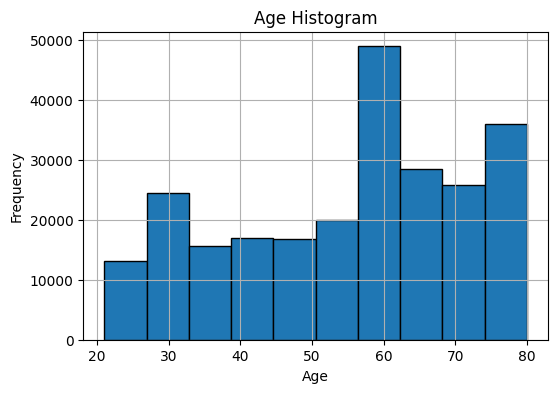

In [9]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(6, 4))
plt.hist(df['AgeCategory'], bins=10, edgecolor='black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<BarContainer object of 3 artists>

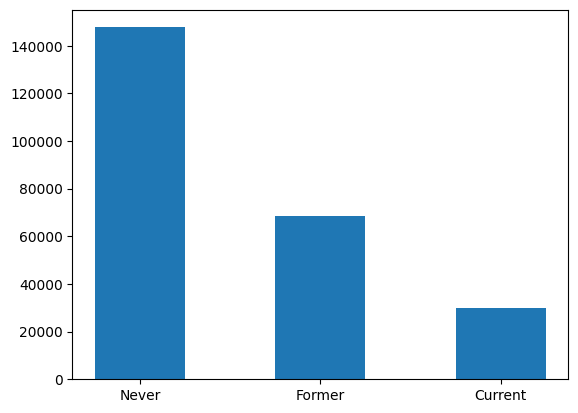

In [17]:
categories = df["SmokerStatus"].value_counts().index
counts = df["SmokerStatus"].value_counts().values
plt.bar(categories, counts, width=0.5)